In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-l_b9faay
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-l_b9faay


# Car Detection


F:\python\envs\py8\lib\site-packages\torch\_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ..\aten\src\ATen\native\BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
F:\python\envs\py8\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([0, 2], device='cuda:0')
Boxes(tensor([[ 619.5560,  374.5608,  793.6017,  540.9788],
        [ 262.9050,  106.4870,  944.8198, 1019.8591]], device='cuda:0'))


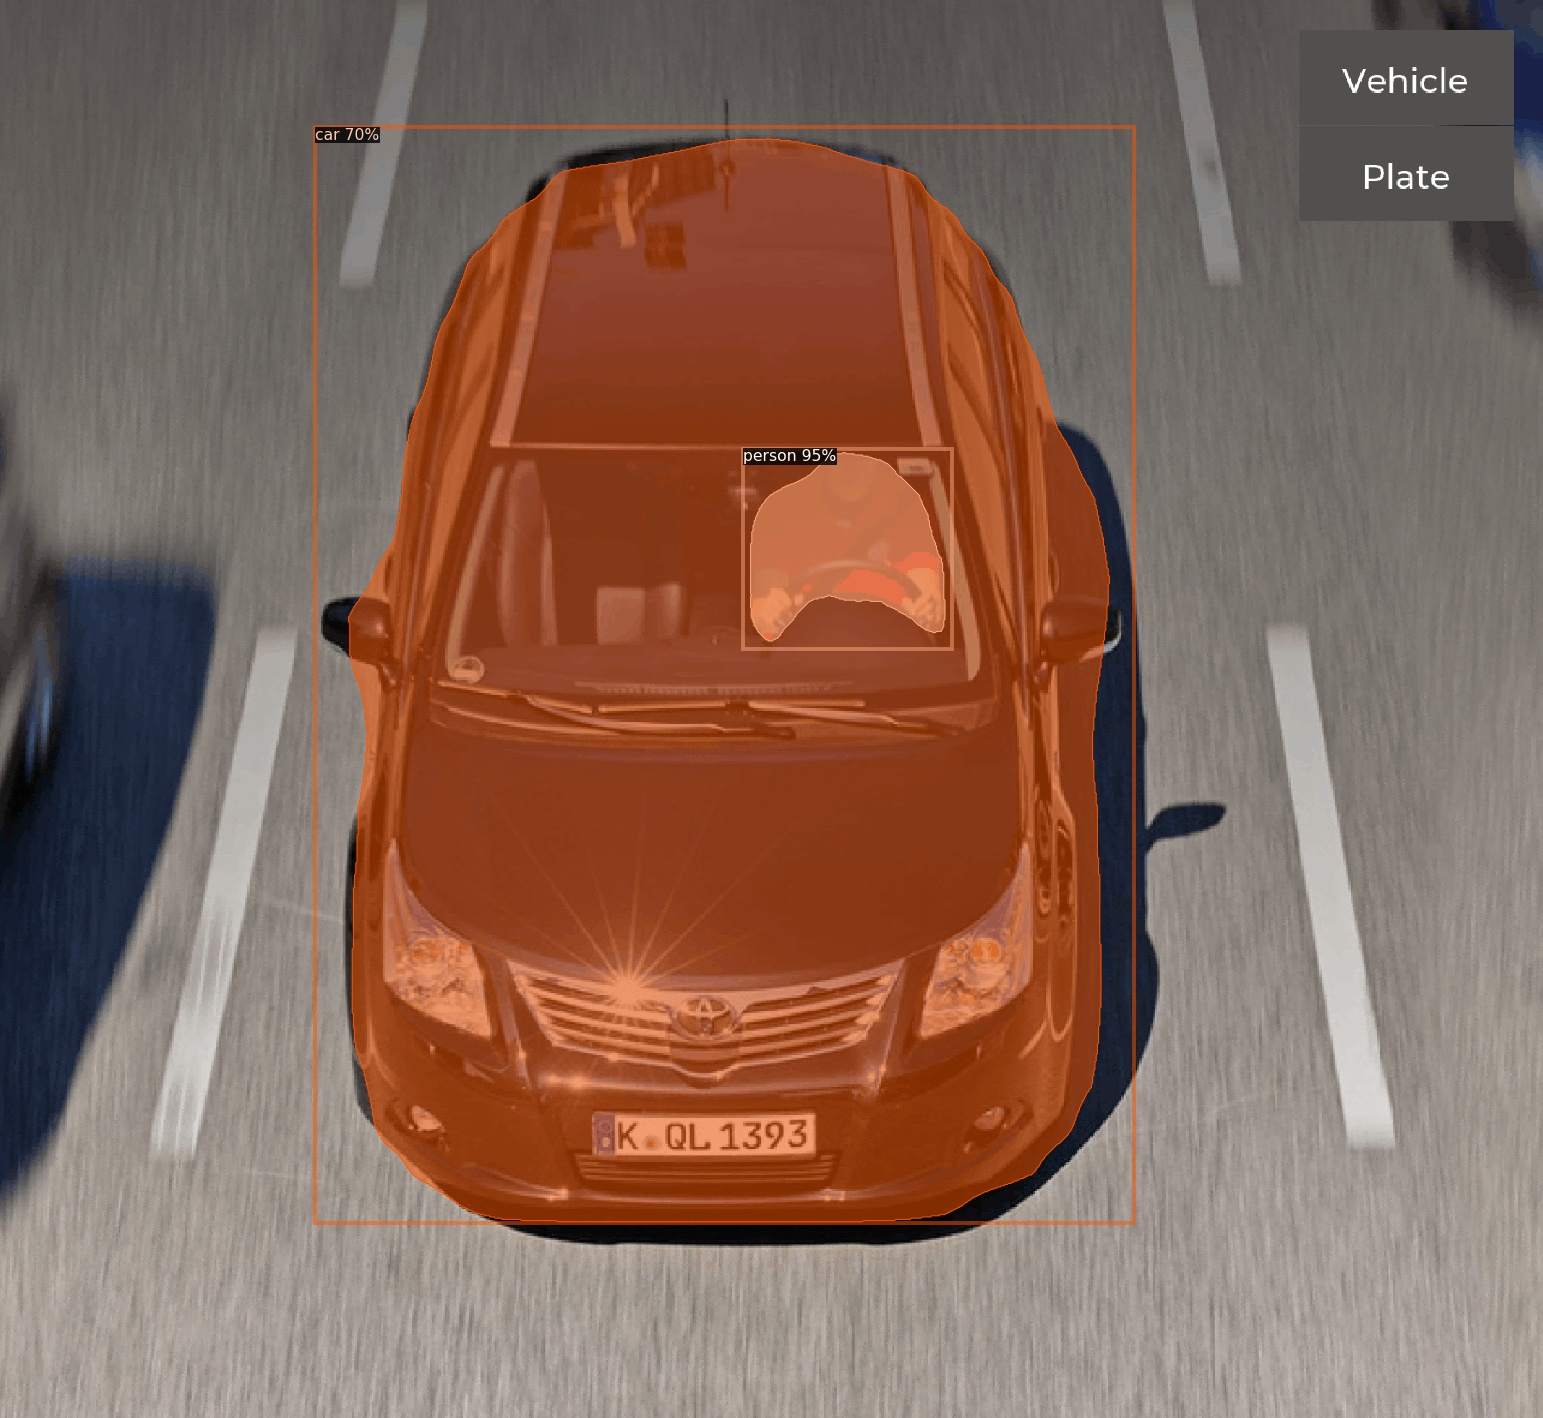

tensor([2], device='cuda:0')
Boxes(tensor([[ 67.2078,  85.0681, 522.9947, 301.6839]], device='cuda:0'))


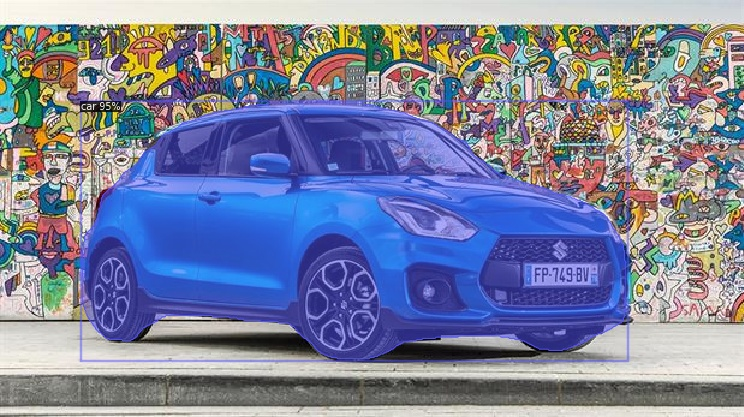

tensor([0, 2], device='cuda:0')
Boxes(tensor([[1054.0438,  277.2340, 1220.3083,  414.3742],
        [ 296.6602,  141.4447, 2198.7607, 1129.8046]], device='cuda:0'))


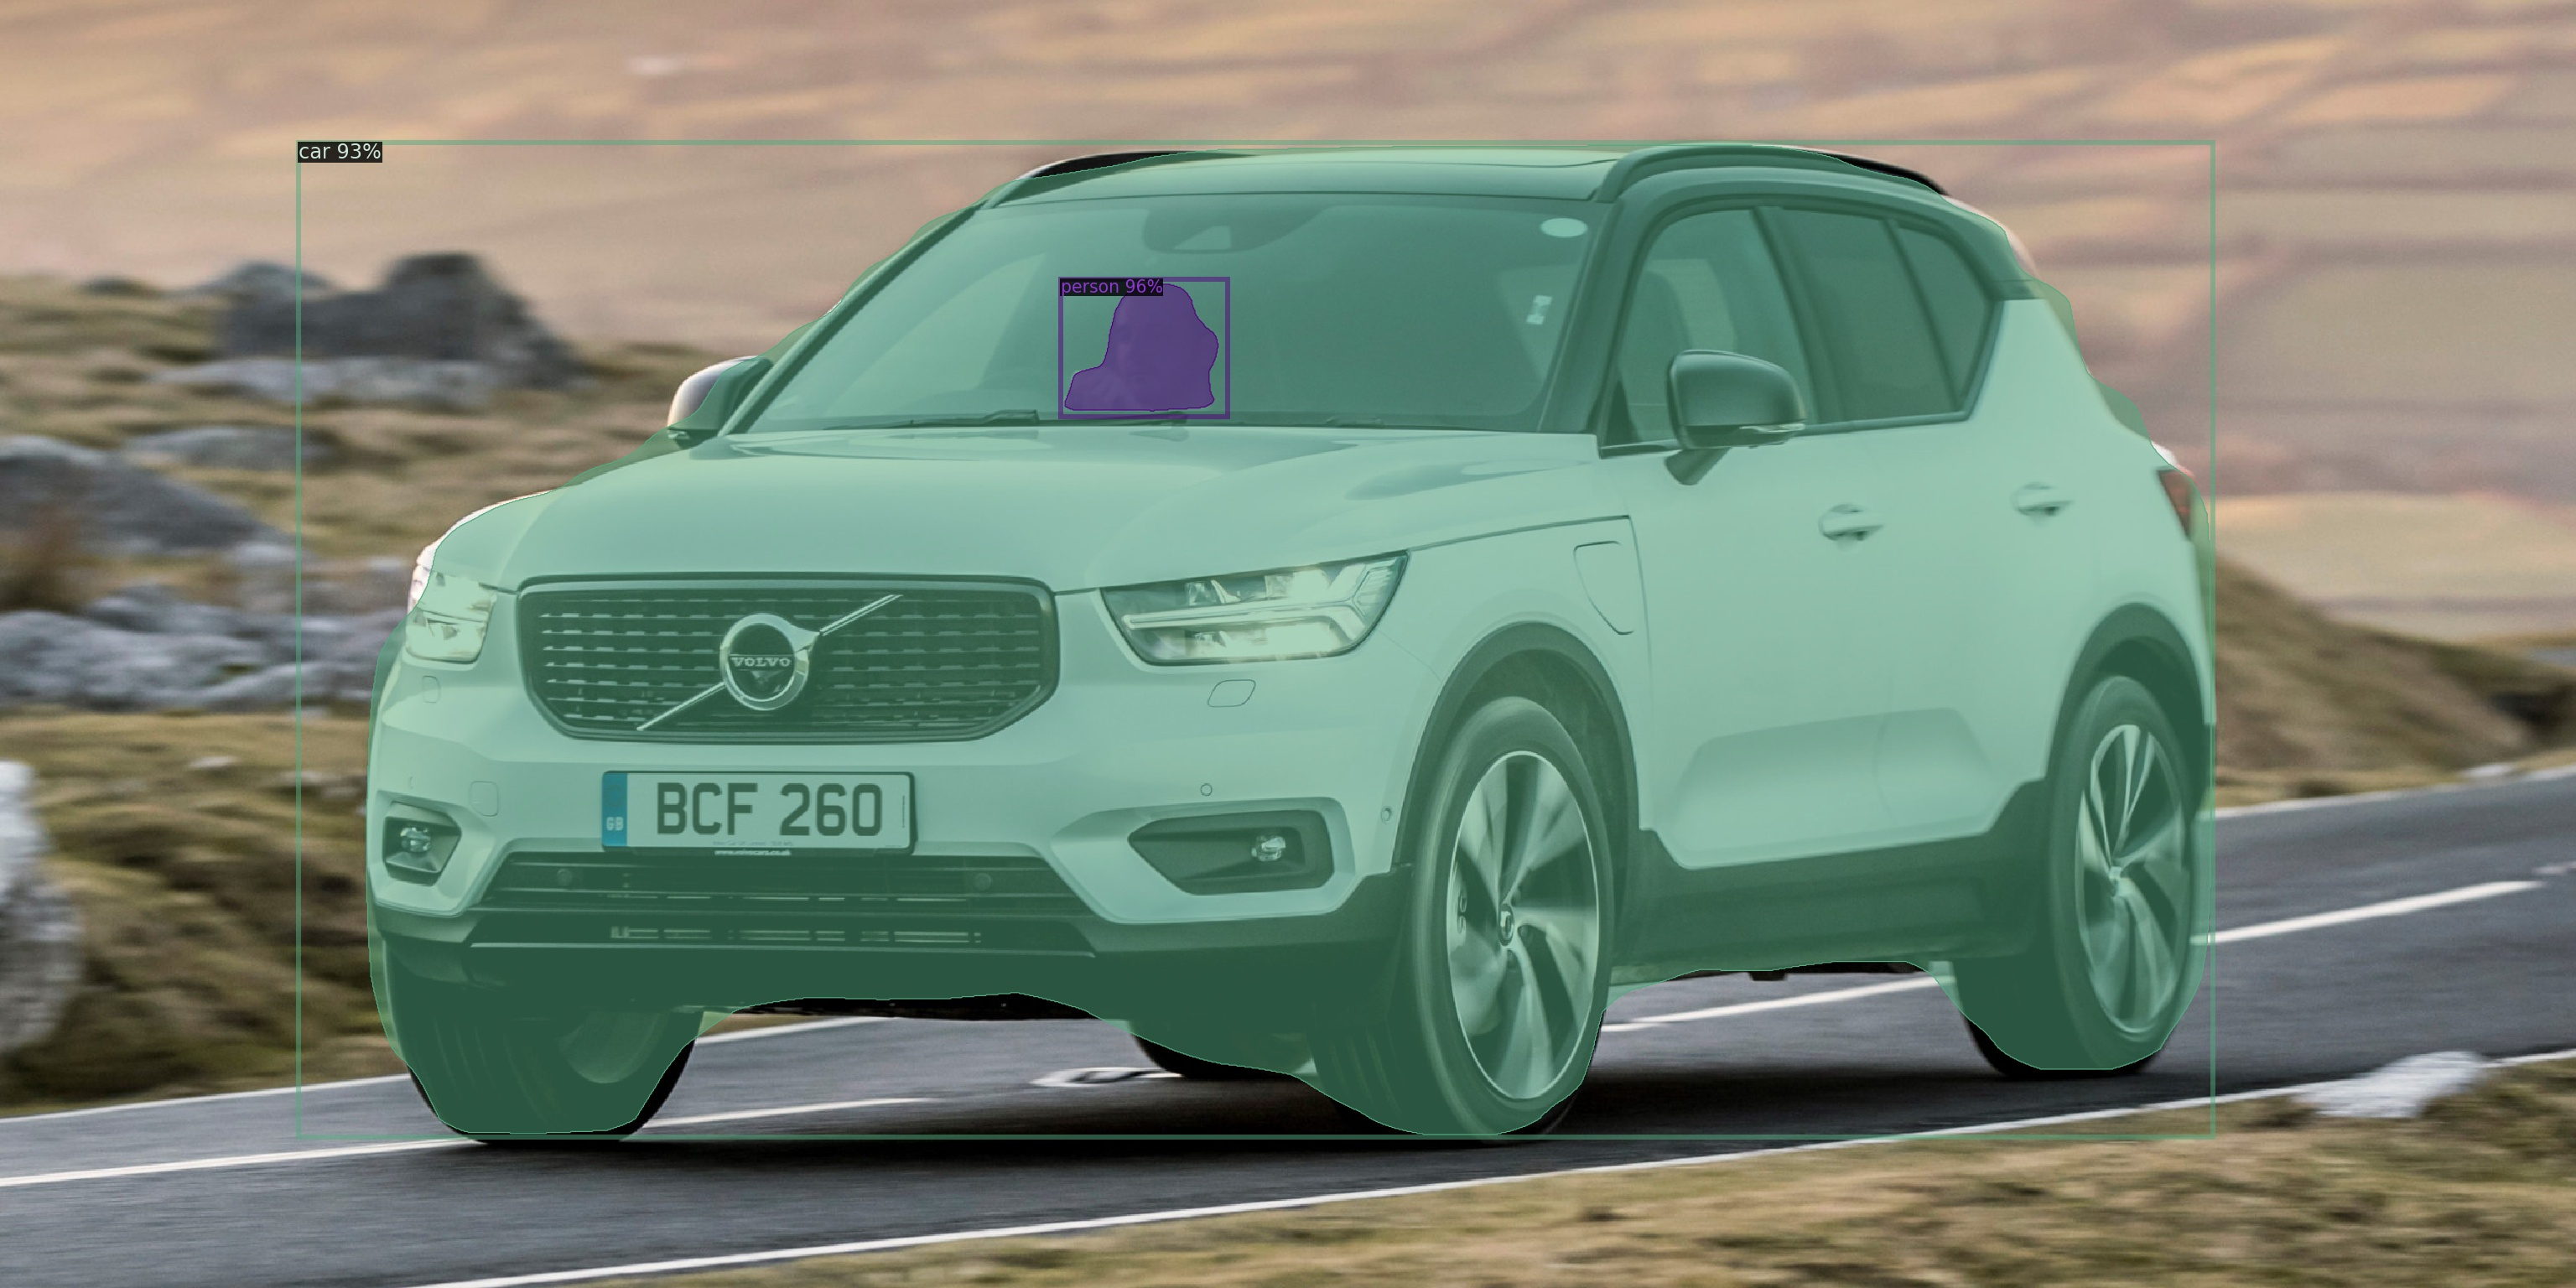

tensor([2], device='cuda:0')
Boxes(tensor([[202.8286,  40.3731, 352.4676, 158.1181]], device='cuda:0'))


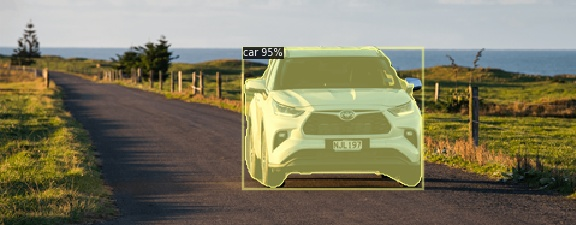

In [1]:
import detectron2
import cv2
import os
import platform
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
if any(platform.win32_ver()):
  base_dir='./car'
  def cv2_imshow(img):       
        import IPython
        _,ret = cv2.imencode('.jpg', img) 
        i = IPython.display.Image(data=ret)
        IPython.display.display(i)
else:      
  from google.colab.patches import cv2_imshow
  base_dir='/content/drive/MyDrive/data/car'

def detect_img(predictor,im):
  outputs = predictor(im)
  print(outputs["instances"].pred_classes)
  print(outputs["instances"].pred_boxes)
  v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow( out.get_image()[:, :, ::-1])

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(
    model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
predictor = DefaultPredictor(cfg)


for test_file in os.listdir(base_dir):       
        if test_file.endswith(".gif"):
          cap = cv2.VideoCapture(os.path.join(base_dir,test_file))
          ret, image = cap.read()
          cap.release()
          if cap:
            im=image
        else:
          im = cv2.imread(os.path.join(base_dir,test_file))
        if im is not None:
          detect_img(predictor,im)
        

tensor([ 0,  0,  0, 20,  0], device='cuda:0')
Boxes(tensor([[268.0551, 329.3857, 316.4725, 409.0632],
        [323.9795, 327.2056, 369.7097, 412.0058],
        [316.3805, 327.9458, 346.2695, 406.9662],
        [291.9850, 301.1780, 411.0214, 409.7128],
        [296.9951, 327.3564, 341.6170, 415.6180]], device='cuda:0'))


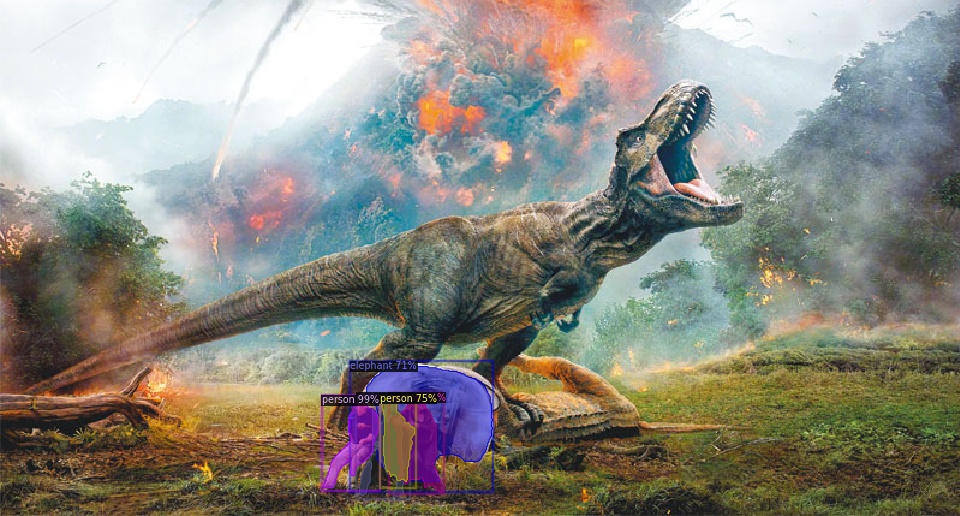

In [7]:
if any(platform.win32_ver()):
    trax_file="./test/wd06209-5349-0729-001.jpg"
else:
    trax_file="/content/drive/MyDrive/data/trax/test/wd06209-5349-0729-001.jpg"
detect_img(predictor,cv2.imread(trax_file))

# Transfer Learning

In [1]:
import detectron2
import platform
# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer



In [2]:
if any(platform.win32_ver()):
    base_path='./'
    def cv2_imshow(img):       
        import IPython
        _,ret = cv2.imencode('.jpg', img) 
        i = IPython.display.Image(data=ret)
        IPython.display.display(i)
else:
    base_path="/content/drive/MyDrive/data/trax/"
    from google.colab.patches import cv2_imshow


  

In [10]:
!pip install labelme2coco
# import package
import labelme2coco

# set directory that contains labelme annotations and image files
labelme_folder = os.path.join(base_path,"mask")

# set path for coco json to be saved
save_json_path =  os.path.join(base_path,"mask","test_coco.json")

os.remove(save_json_path) if os.path.exists(save_json_path) else None
# convert labelme annotations to coco
labelme2coco.convert(labelme_folder, save_json_path)


In [3]:
register_coco_instances("trax", {}, os.path.join(base_path,"mask/test_coco.json"), base_path)

In [4]:
cfg = get_cfg()
model_name = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
cfg.merge_from_file(model_zoo.get_config_file(model_name))
cfg.DATASETS.TRAIN = ("trax",)
cfg.DATASETS.TEST = ()
cfg.OUTPUT_DIR=os.path.join(base_path,"output")



In [8]:
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    model_name
)  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH =4
cfg.SOLVER.BASE_LR = 0.00055  # pick a good LR
cfg.SOLVER.MAX_ITER = 400
cfg.SOLVER.STEPS = []  # do not decay learning rate

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[09/21 09:19:36 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[09/21 09:19:36 d2.data.datasets.coco]: Loaded 29 images in COCO format from ./mask/test_coco.json
[09/21 09:19:36 d2.data.build]: Removed 0 images with no usable annotations. 29 images left.
[09/21 09:19:36 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[09/21 09:19:36 d2.data.build]: Using training sampler TrainingSampler
[09/21 09:19:36 d2.data.common]: Serializing 29 elements to byte tensors and concatenating them all ...
[09/21 09:19:36 d2.data.common]: Serialized dataset takes 0.07 MiB


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[09/21 09:19:37 d2.engine.train_loop]: Starting training from iteration 0
[09/21 09:19:58 d2.utils.events]:  eta: 0:05:24  iter: 19  total_loss: 1.492  loss_cls: 0.6428  loss_box_reg: 0.1193  loss_mask: 0.6865  loss_rpn_cls: 0.003218  loss_rpn_loc: 0.04091  time: 0.8764  data_time: 0.2130  lr: 2.6649e-05  max_mem: 5285M
[09/21 09:20:15 d2.utils.events]:  eta: 0:05:07  iter: 39  total_loss: 1.096  loss_cls: 0.3212  loss_box_reg: 0.1148  loss_mask: 0.6035  loss_rpn_cls: 0.00345  loss_rpn_loc: 0.03284  time: 0.8589  data_time: 0.0041  lr: 5.4121e-05  max_mem: 5285M
[09/21 09:20:32 d2.utils.events]:  eta: 0:04:53  iter: 59  total_loss: 0.7953  loss_cls: 0.1529  loss_box_reg: 0.1207  loss_mask: 0.4606  loss_rpn_cls: 0.005489  loss_rpn_loc: 0.03182  time: 0.8622  data_time: 0.0151  lr: 8.1594e-05  max_mem: 5285M
[09/21 09:20:49 d2.utils.events]:  eta: 0:04:35  iter: 79  total_loss: 0.5698  loss_cls: 0.09785  loss_box_reg: 0.1074  loss_mask: 0.3215  loss_rpn_cls: 0.001998  loss_rpn_loc: 0.023

tensor([0, 0, 0, 0, 0, 0], device='cuda:0')
Boxes(tensor([[727.0828, 774.0268, 989.6010, 978.3041],
        [392.0338, 525.3051, 668.2291, 758.0660],
        [ 57.7001, 787.8522, 340.2568, 986.7585],
        [718.6775, 309.1736, 972.0208, 517.8556],
        [405.6127, 766.3705, 694.6146, 986.3839],
        [372.9424,  17.7011, 660.6448, 291.0764]], device='cuda:0'))


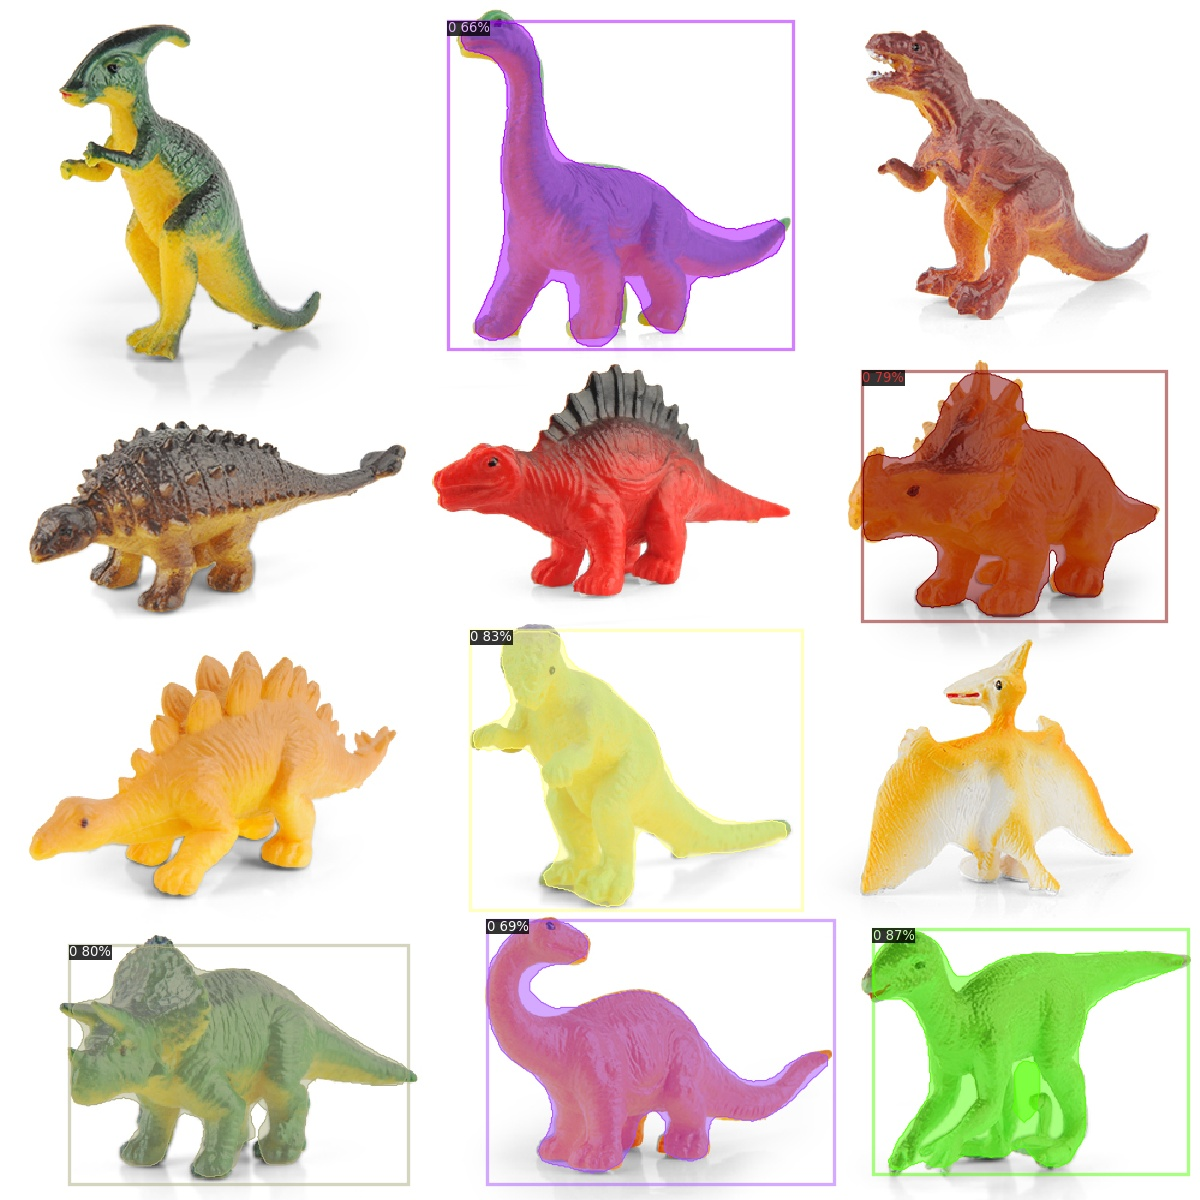

tensor([0], device='cuda:0')
Boxes(tensor([[ 11.6182,  24.0509, 535.0839, 393.2591]], device='cuda:0'))


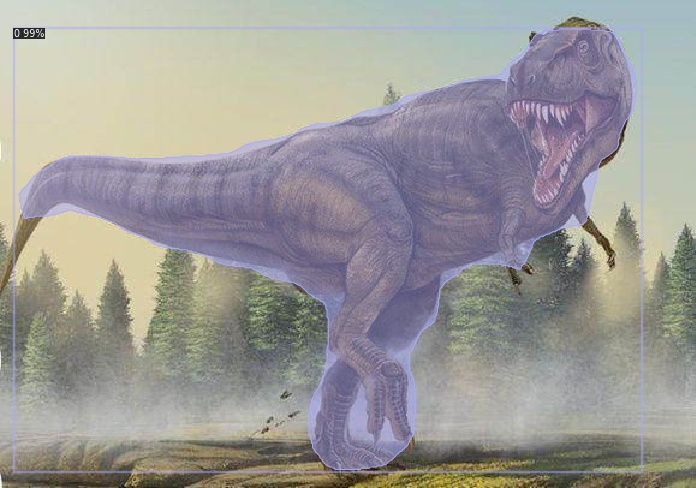

tensor([0], device='cuda:0')
Boxes(tensor([[ 17.4035,   6.6083, 280.2798, 162.4305]], device='cuda:0'))


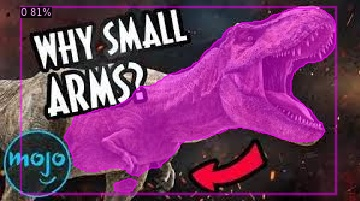

tensor([0], device='cuda:0')
Boxes(tensor([[ 35.2104,   2.7423, 300.0000, 144.2512]], device='cuda:0'))


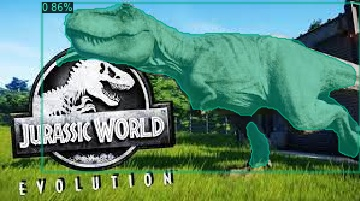

tensor([0], device='cuda:0')
Boxes(tensor([[  1.5331,   2.1678, 271.8981, 168.5972]], device='cuda:0'))


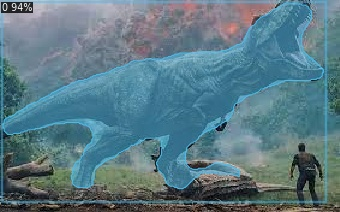

tensor([0], device='cuda:0')
Boxes(tensor([[   0.0000,   25.6102, 1022.9556,  675.0000]], device='cuda:0'))


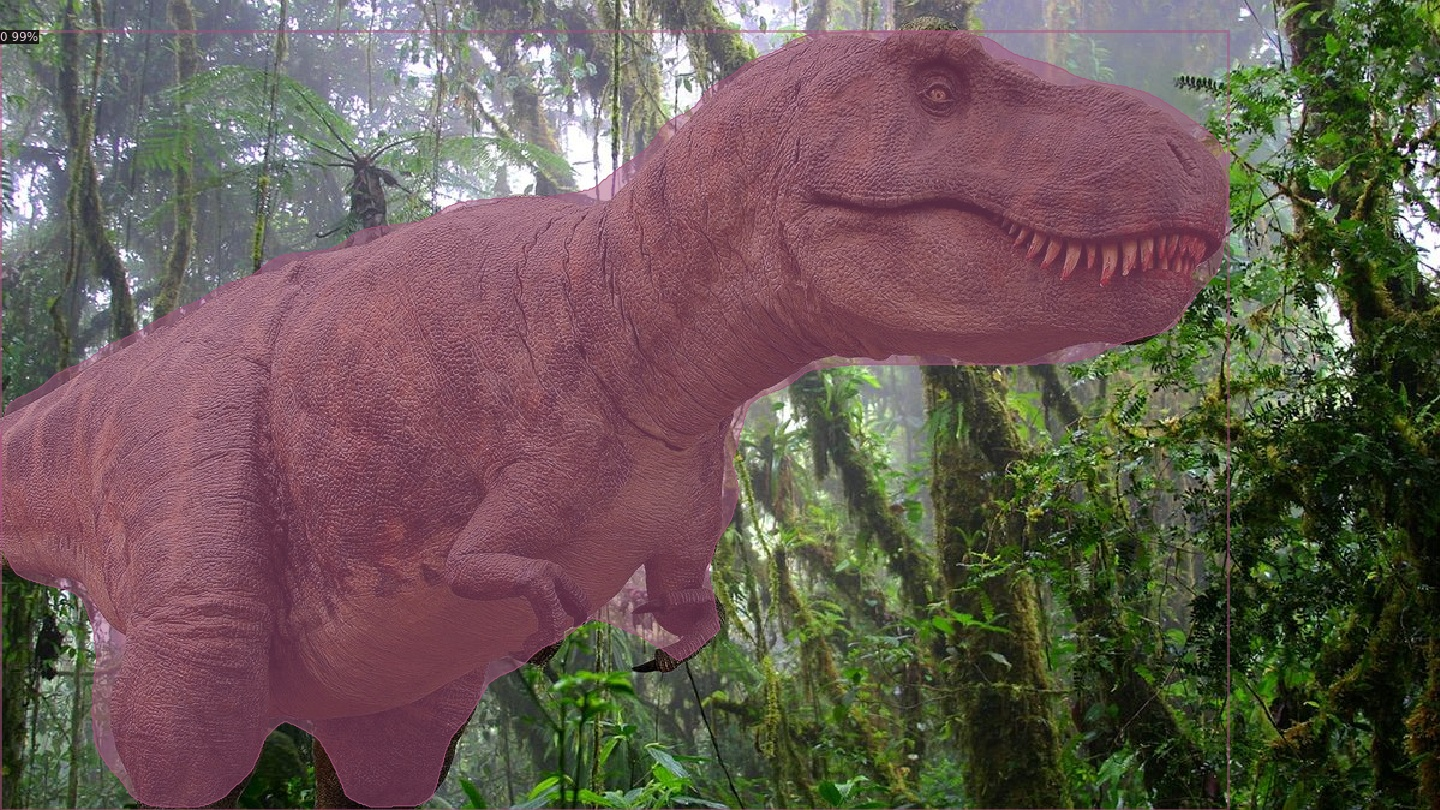

tensor([0, 0, 0, 0], device='cuda:0')
Boxes(tensor([[ 537.5833,  604.7650, 1415.3412, 1109.5203],
        [ 169.5620,  837.5465,  731.4698, 1142.4580],
        [  61.4668,  980.0850,  754.0418, 1483.5730],
        [1045.4055,  880.0423, 1481.0576, 1247.4509]], device='cuda:0'))


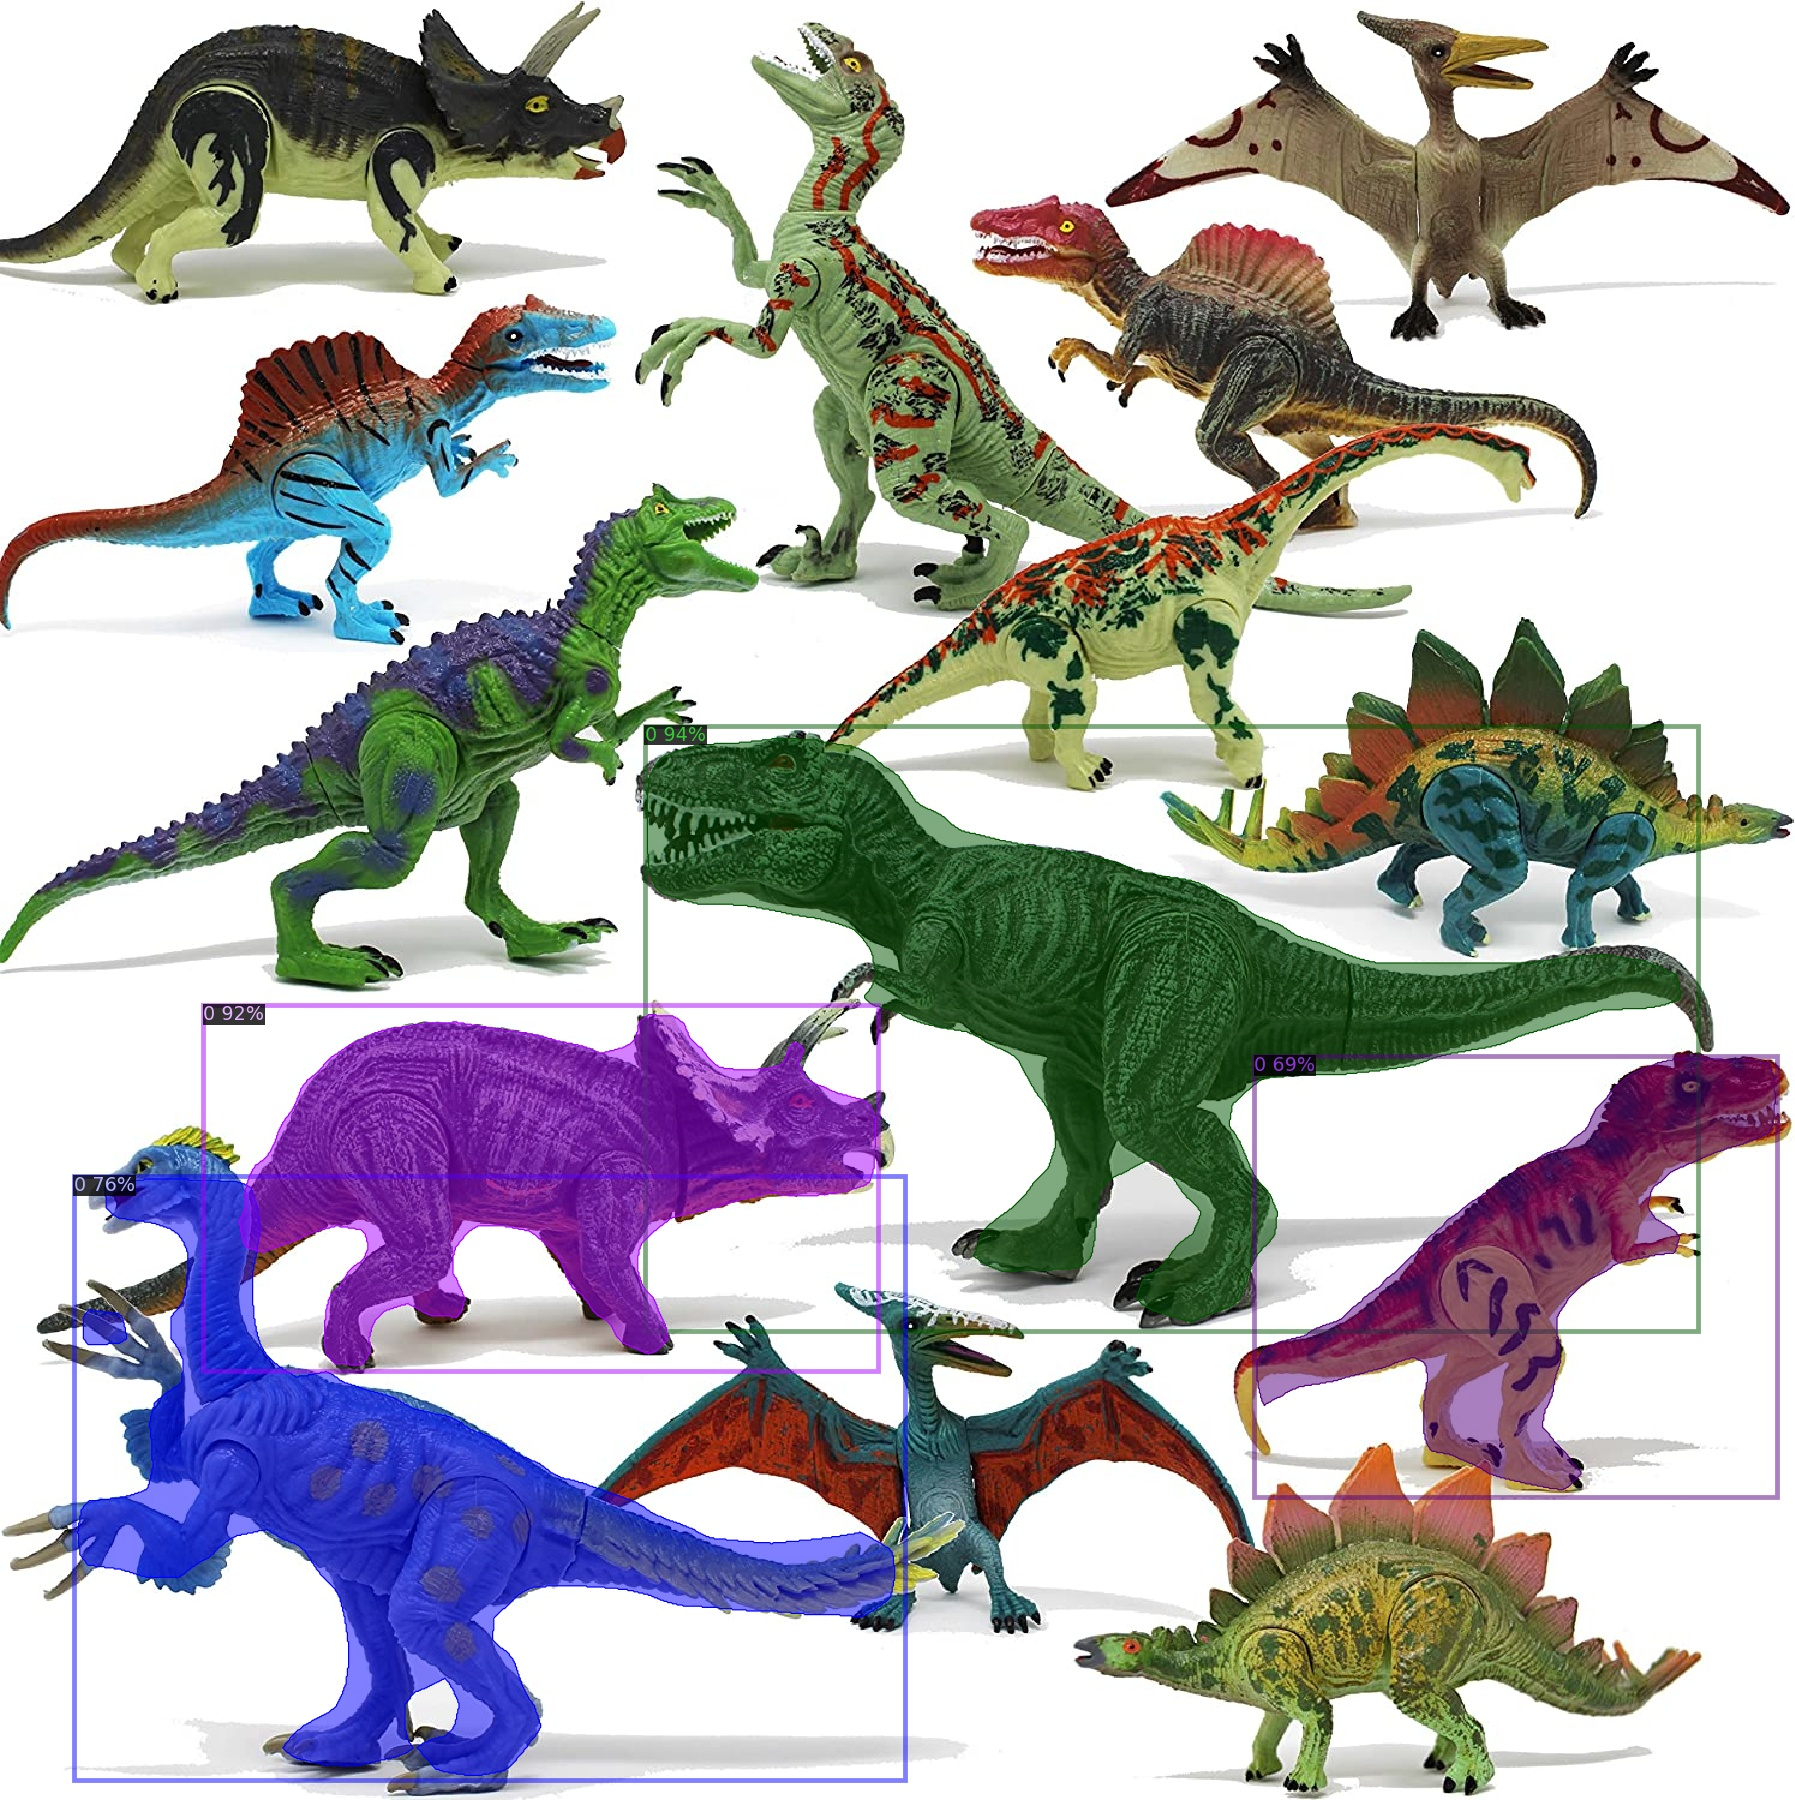

tensor([0], device='cuda:0')
Boxes(tensor([[   0.0000,    0.0000, 1137.0847,  674.0000]], device='cuda:0'))


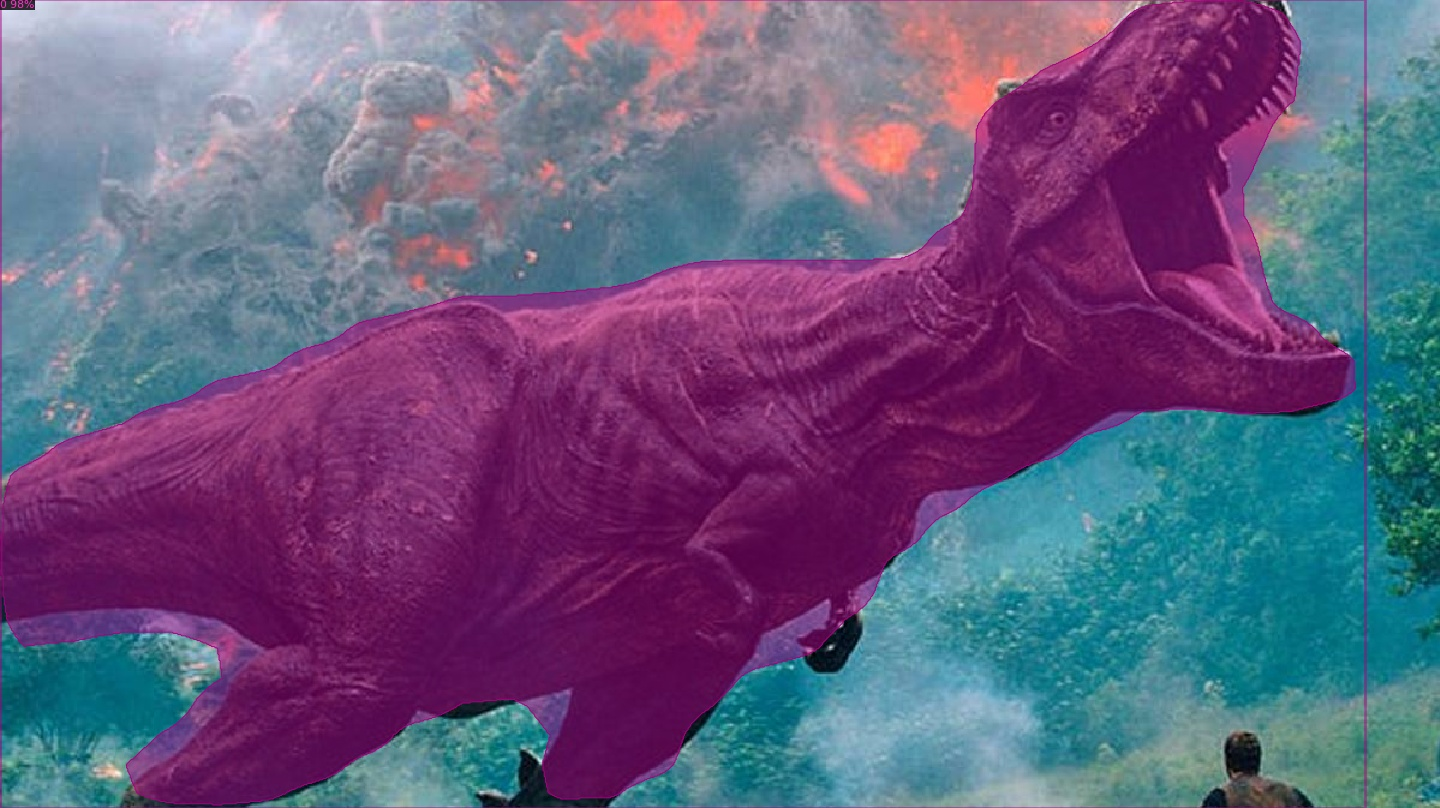

tensor([0], device='cuda:0')
Boxes(tensor([[  0.0000,   0.0000, 256.0000, 193.8181]], device='cuda:0'))


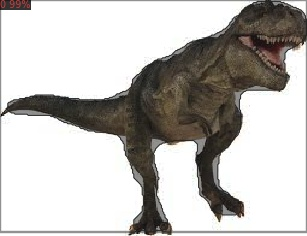

tensor([0], device='cuda:0')
Boxes(tensor([[ 13.4471,   6.8642, 223.9258, 212.8750]], device='cuda:0'))


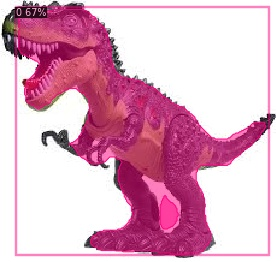

tensor([0], device='cuda:0')
Boxes(tensor([[ 40.8265,   5.7162, 283.1041, 166.6711]], device='cuda:0'))


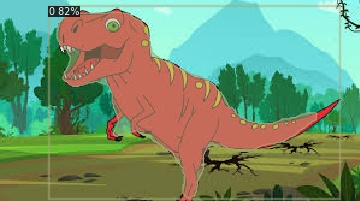

tensor([0], device='cuda:0')
Boxes(tensor([[ 61.7980,   7.9350, 209.3006, 173.1003]], device='cuda:0'))


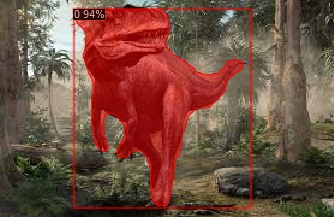

tensor([0], device='cuda:0')
Boxes(tensor([[  7.5209,   4.8688, 219.7669, 218.9604]], device='cuda:0'))


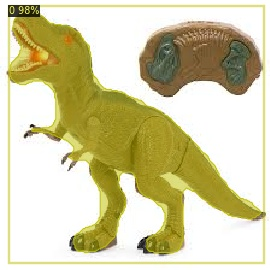

tensor([0], device='cuda:0')
Boxes(tensor([[ 20.2917,   5.1154, 256.4018, 169.9948]], device='cuda:0'))


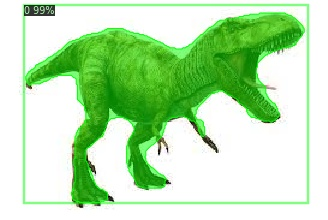

tensor([0], device='cuda:0')
Boxes(tensor([[ 48.2501,  29.2792, 228.7028, 181.1723]], device='cuda:0'))


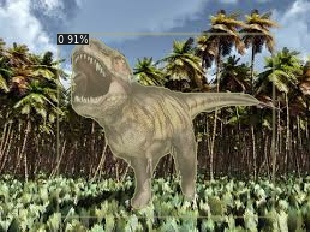

tensor([0], device='cuda:0')
Boxes(tensor([[ 48.4023,   5.3055, 229.4597, 175.9162]], device='cuda:0'))


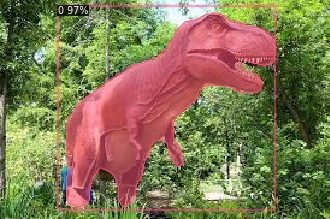

tensor([0], device='cuda:0')
Boxes(tensor([[ 82.6679,  20.0906, 260.3682, 133.0211]], device='cuda:0'))


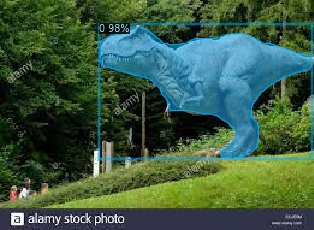

tensor([0], device='cuda:0')
Boxes(tensor([[ 40.7157,   3.7335, 170.1774, 256.9679]], device='cuda:0'))


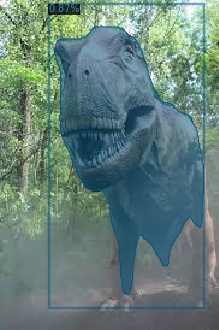

tensor([0], device='cuda:0')
Boxes(tensor([[ 10.3224,   6.7674, 257.7598, 149.3481]], device='cuda:0'))


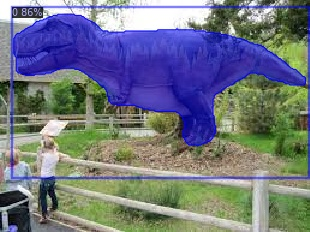

tensor([0], device='cuda:0')
Boxes(tensor([[ 57.3054,  30.4113, 241.1414, 163.7792]], device='cuda:0'))


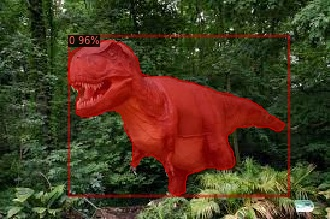

tensor([0], device='cuda:0')
Boxes(tensor([[ 61.4235,  42.9728, 267.1867, 131.1008]], device='cuda:0'))


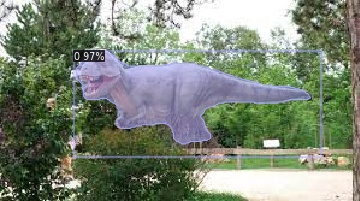

tensor([0], device='cuda:0')
Boxes(tensor([[ 30.1193,   7.8843, 276.6124, 156.8359]], device='cuda:0'))


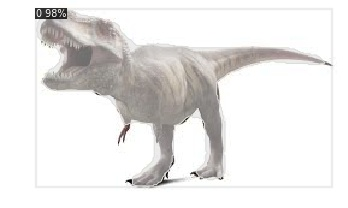

tensor([], device='cuda:0', dtype=torch.int64)
Boxes(tensor([], device='cuda:0', size=(0, 4)))


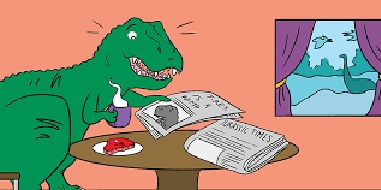

tensor([], device='cuda:0', dtype=torch.int64)
Boxes(tensor([], device='cuda:0', size=(0, 4)))


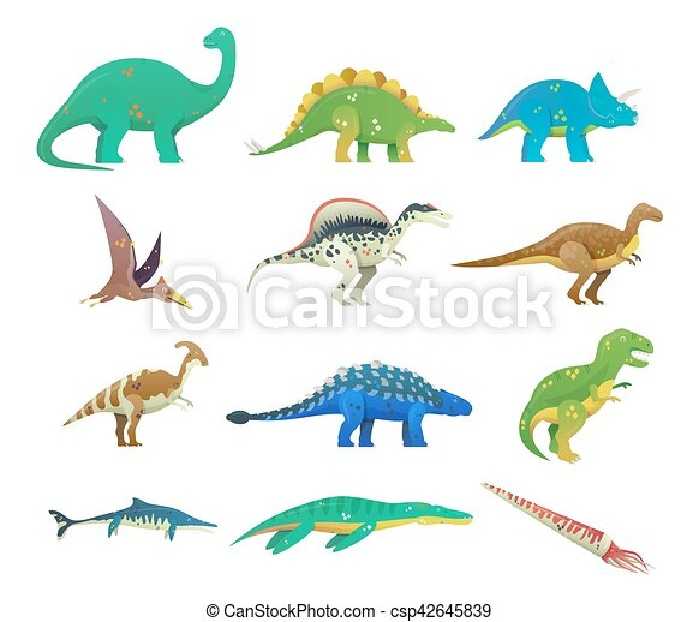

tensor([0], device='cuda:0')
Boxes(tensor([[ 18.7528,  15.1066, 206.4710, 232.3020]], device='cuda:0'))


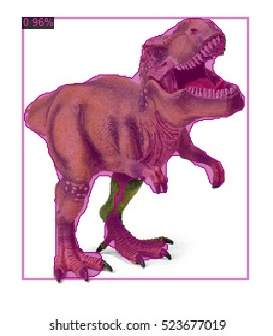

tensor([0], device='cuda:0')
Boxes(tensor([[ 31.2394,  64.3518, 618.6808, 409.7118]], device='cuda:0'))


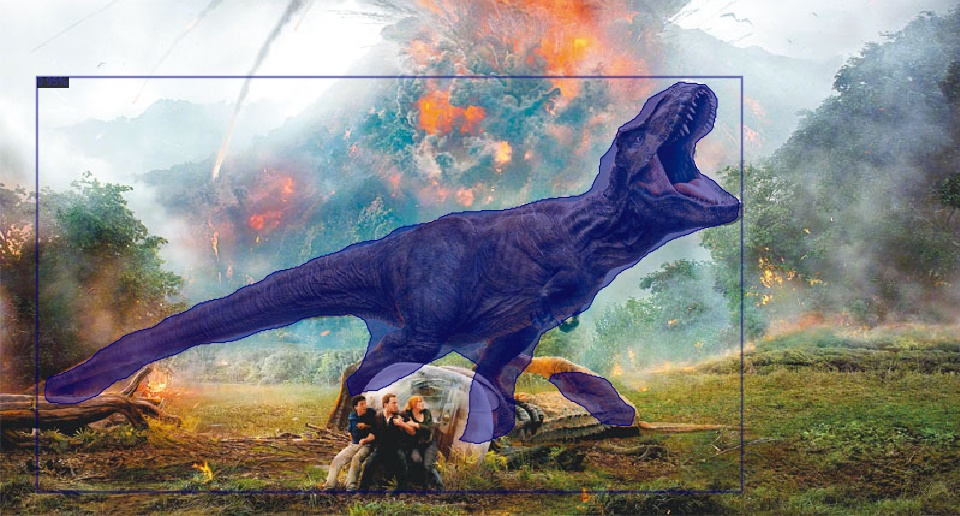

In [7]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
predictor = DefaultPredictor(cfg)
for x in os.listdir(os.path.join(base_path,"test")):
    im = cv2.imread(os.path.join(base_path,"test",x))    
    outputs = predictor(im)
    print(outputs["instances"].pred_classes)
    print(outputs["instances"].pred_boxes)
    v = Visualizer(
        im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow( out.get_image()[:, :, ::-1])
    

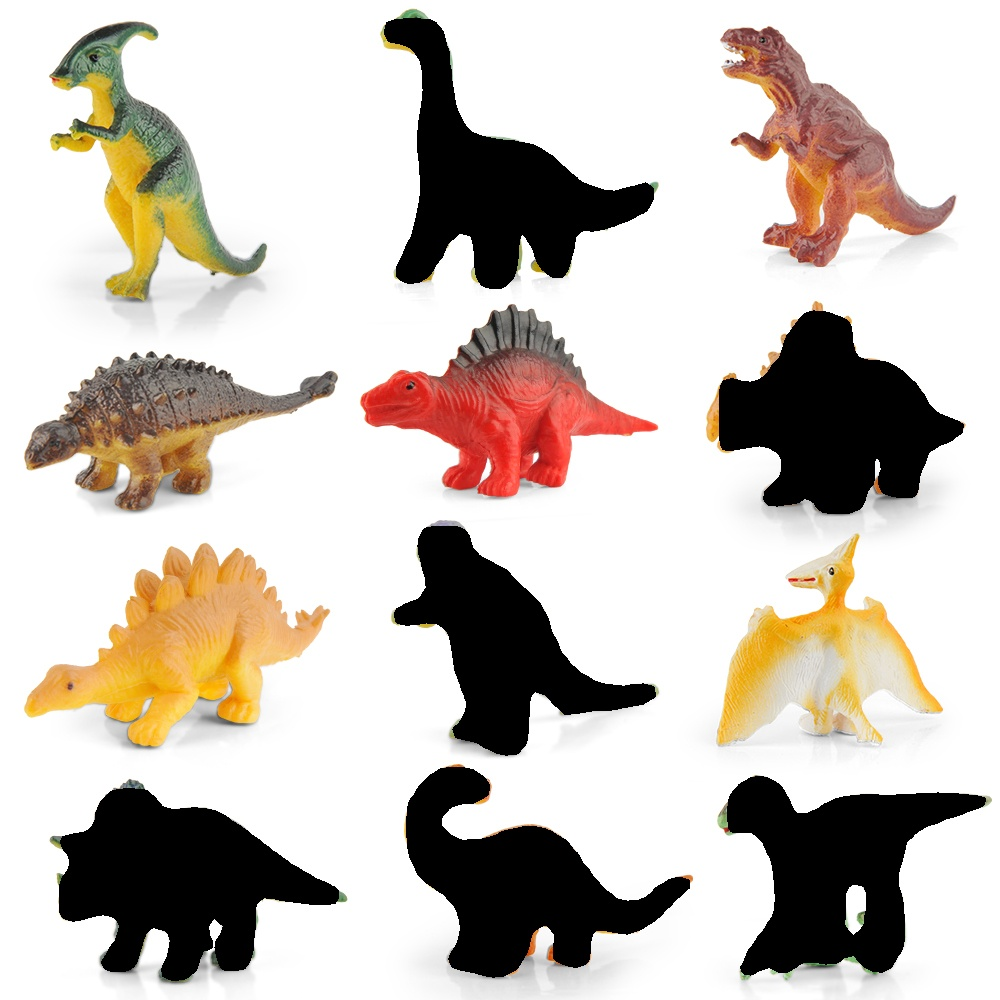

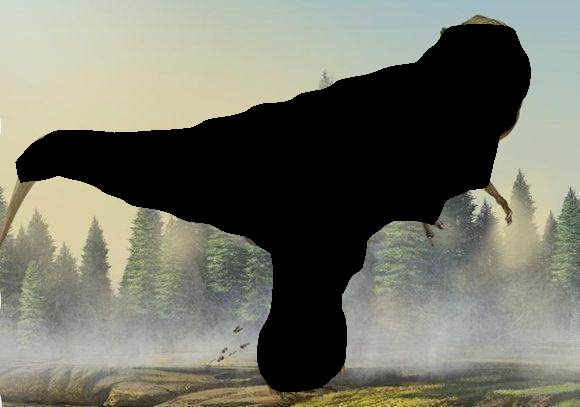

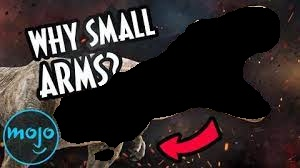

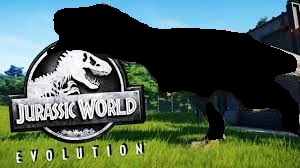

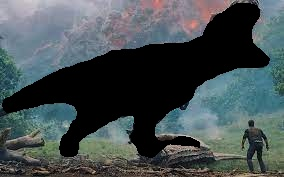

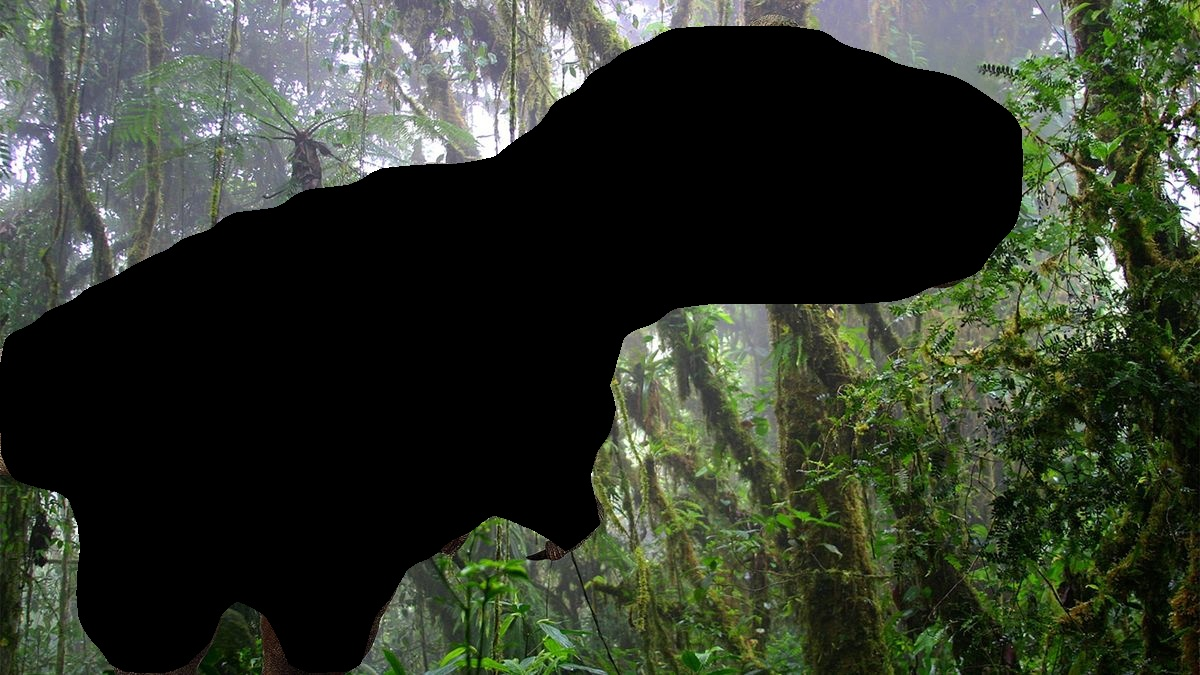

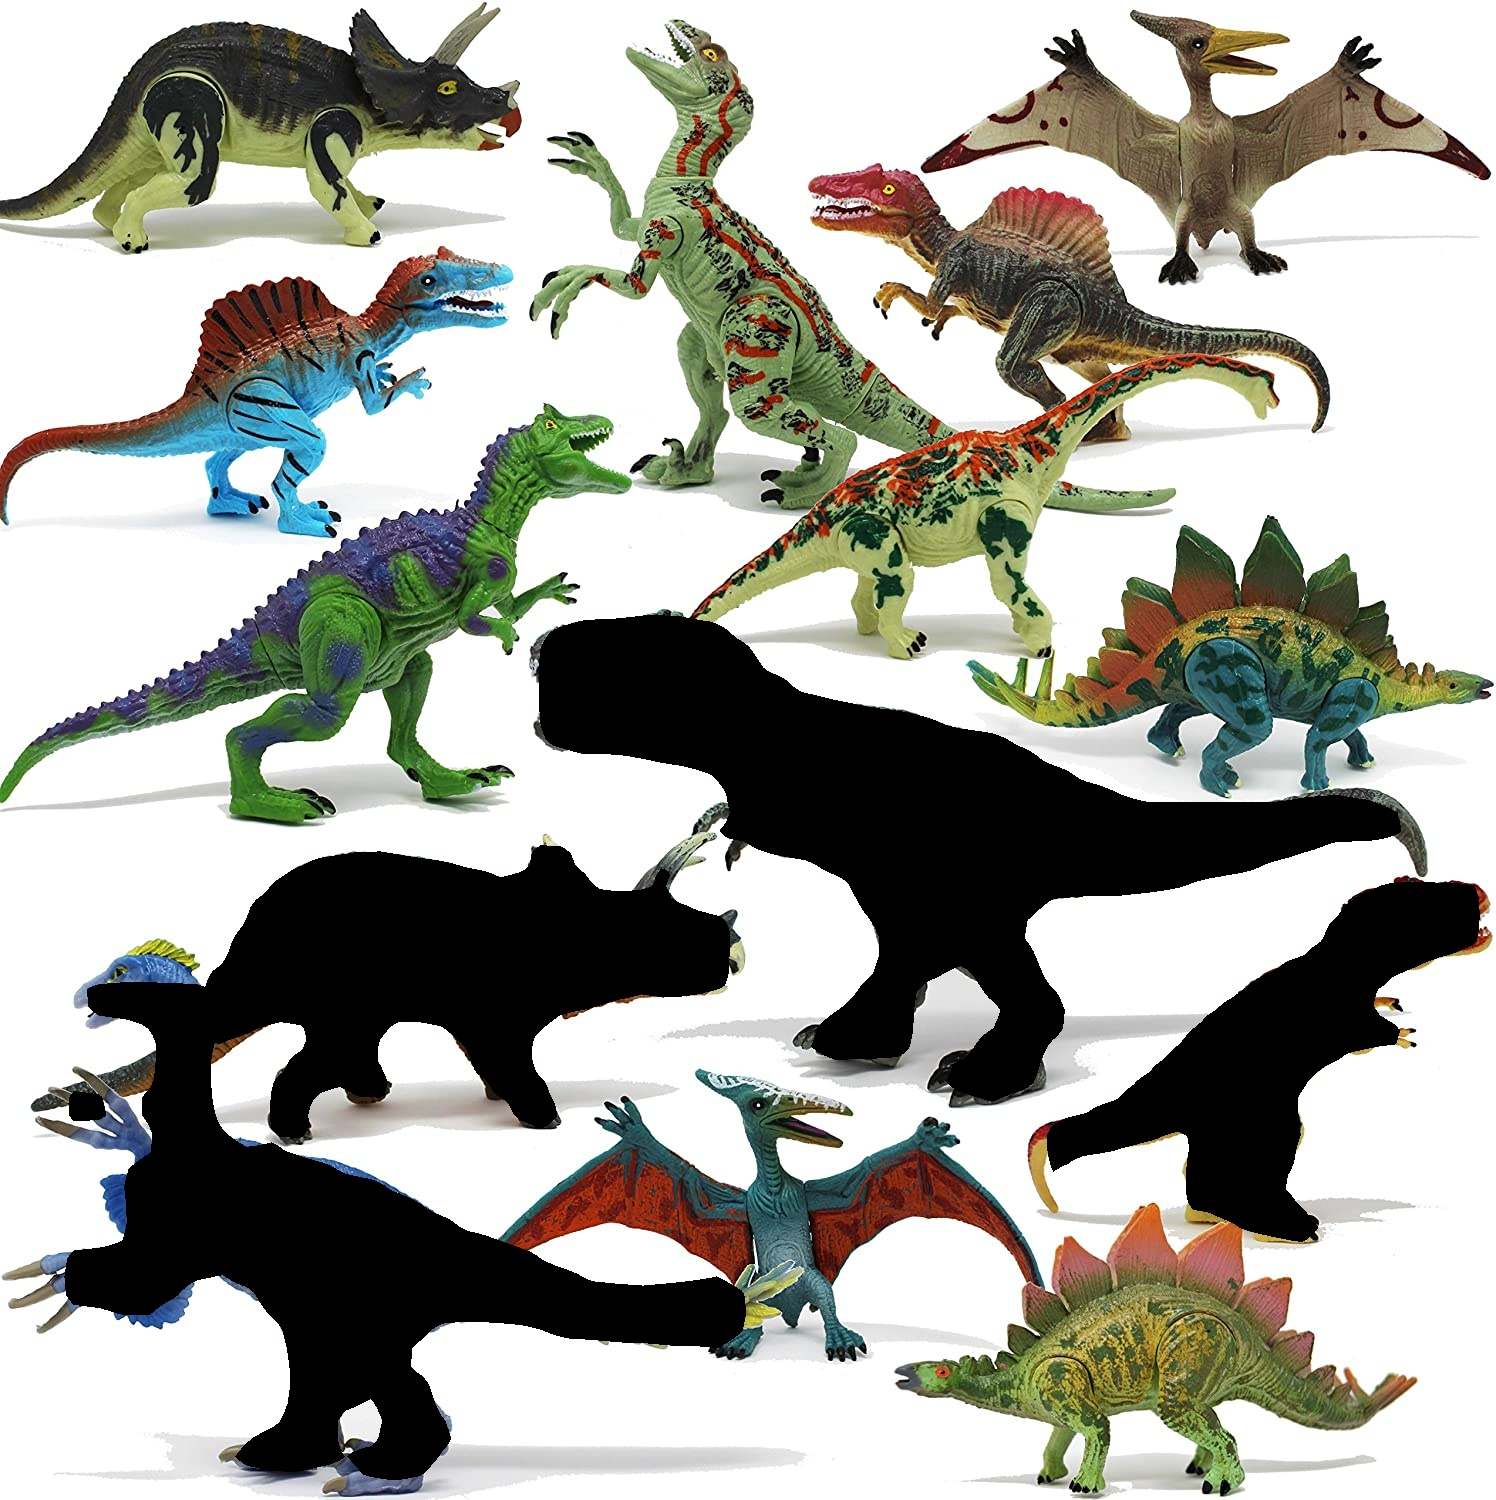

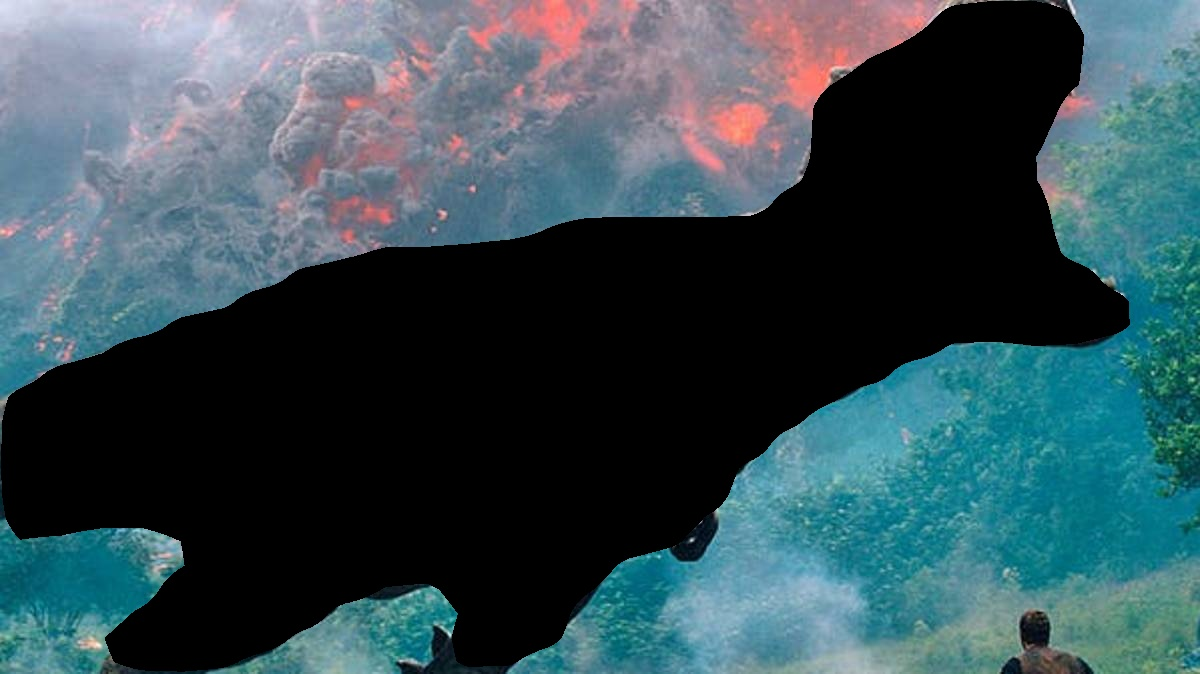

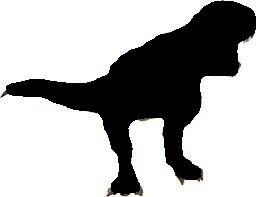

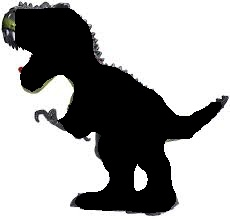

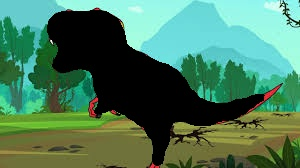

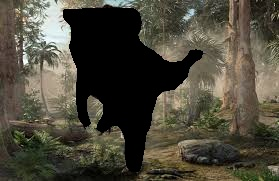

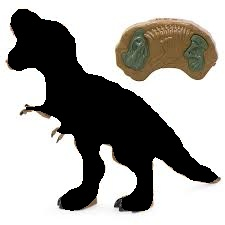

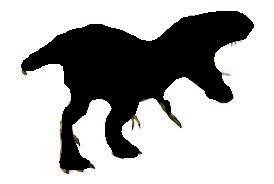

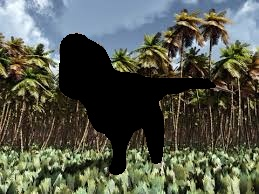

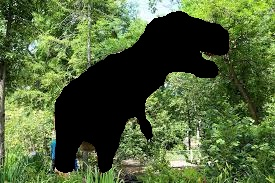

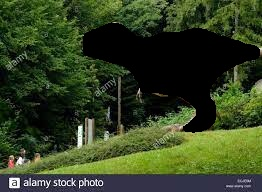

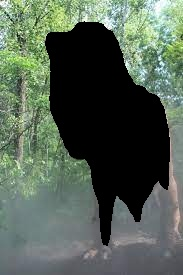

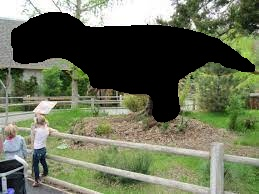

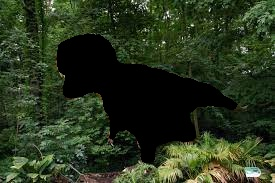

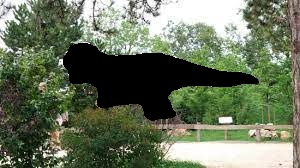

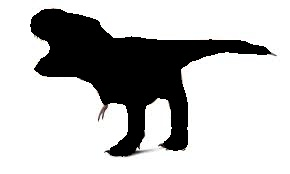

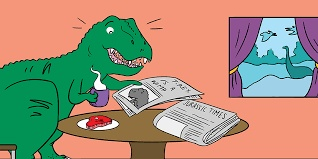

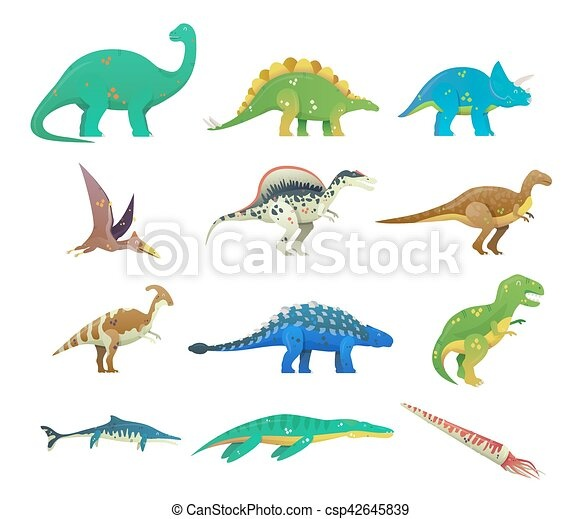

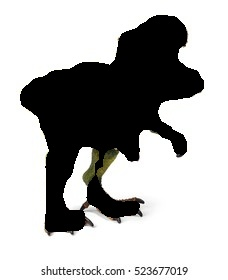

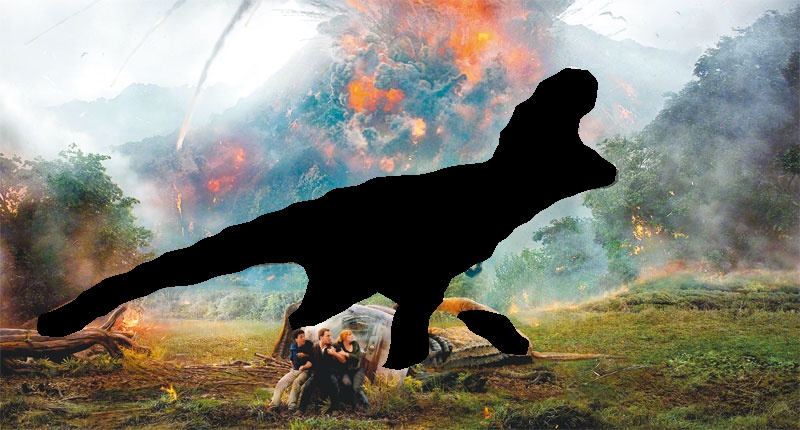

In [8]:
for x in os.listdir(os.path.join(base_path,"test")):
    im = cv2.imread(os.path.join(base_path,"test",x))    
    outputs = predictor(im)    
    for mask in outputs["instances"].to("cpu").pred_masks:
                im[mask, :] = [0, 0, 0]
    cv2_imshow(im)